In [1]:
;-----------------------------------------------------------------
;  NCL User Guide Example:  NUG_primitives.ncl
; 
;  KMF 30.10.14
;-----------------------------------------------------------------
print(systemfunc("date"))

(0)	Wed Aug 23 21:20:00 EDT 2017

In [2]:
;-- set global values
;-- define coordinates for the cities:  Hamburg and Munich
ham_lat = 53.51
ham_lon = 10.0
muc_lat = 48.12
muc_lon = 11.51
ber_lat = 52.5
ber_lon = 13.35


In [3]:
undef("create_map")
function create_map(wks)
begin
;-- set map resources
  res                         =  True
  res@gsnDraw                 =  False
  res@gsnFrame                =  False
  res@gsnMaximize             =  True
  res@mpProjection            = "Mercator"
  res@mpLimitMode             = "Corners"
  res@mpLeftCornerLonF        =   5.0
  res@mpRightCornerLonF       =  16.0
  res@mpLeftCornerLatF        =  47.0
  res@mpRightCornerLatF       =  58.0
  res@mpDataBaseVersion       = "MediumRes"
  res@mpDataSetName           = "Earth..4"
  res@mpOutlineBoundarySets   = "National" 
  res@mpFillOn                =  True
  res@mpOutlineOn             =  True
  res@mpOutlineDrawOrder      = "Draw"
  res@mpGridAndLimbOn         =  True
  res@mpGridLineDashPattern   =  2
  res@mpGridMaskMode          = "MaskLand"
  res@mpGridLatSpacingF       =  1
  res@mpGridLonSpacingF       =  2
  res@mpOceanFillColor        = "LightBlue"
  res@mpLandFillColor         = "tan"
  res@mpInlandWaterFillColor  = "Blue"
  res@mpGeophysicalLineColor  = "Navy" 
  res@mpGeophysicalLineThicknessF = 1.5 
  res@pmTickMarkDisplayMode   = "Always"
  res@tiMainString            = "NCL Doc Example: primitives"
  res@tiMainFontHeightF       =  0.02

  map = gsn_csm_map(wks, res)

  return(map)
end


In [4]:
undef("add_city_markers")
procedure add_city_markers(wks,map)
local mkres
begin
;-- cities: polymarker resources
  mkres                       =  True
  mkres@gsMarkerIndex         =  14
  mkres@gsMarkerColor         = "blue"
  mkres@gsMarkerThicknessF    =  2.0
  map@ham_city = gsn_add_polymarker(wks, map, ham_lon, ham_lat, mkres)
  map@muc_city = gsn_add_polymarker(wks, map, muc_lon, muc_lat, mkres)

  mkres@gsMarkerSizeF         =  0.02
  mkres@gsMarkerThicknessF    =  4.0
  mkres@gsMarkerColor         = "red"
  map@ber_city = gsn_add_polymarker(wks, map, ber_lon, ber_lat, mkres)

end


In [5]:
undef("add_lines_between_cities")
procedure add_lines_between_cities(wks,map)
local pres
begin
;-- trace: polyline resources
  pres                        =  True
  pres@gsLineThicknessF       =  2.0
  pres@gsLineColor            = "blue"
  map@trace = gsn_add_polyline(wks, map, (/ham_lon, muc_lon/), (/ham_lat, muc_lat/), pres)
end


In [6]:
undef("add_city_labels")
procedure add_city_labels(wks,map)
local tres
begin
;-- cities: text resources
  tres                        =  True
  tres@txFontHeightF          =  0.015
  map@ham_text = gsn_add_text(wks, map, "Hamburg", ham_lon+1.2, ham_lat, tres)
  map@muc_text = gsn_add_text(wks, map, "Munich",  muc_lon-1.0, muc_lat, tres)
end


In [7]:
undef("add_colored_text_box")
procedure add_colored_text_box(wks,map)
local xoff, yoff, tres
begin
  xoff = 0.8
  yoff = 0.45
  tres                        =  True
  tres@txBackgroundFillColor  = "white"
  tres@txFontHeightF          =  0.015
  tres@txFontHeightF          =  0.02
  map@ber_text = gsn_add_text(wks, map, "Berlin", ber_lon+xoff, ber_lat+yoff, tres)
end


./NUG_primitives

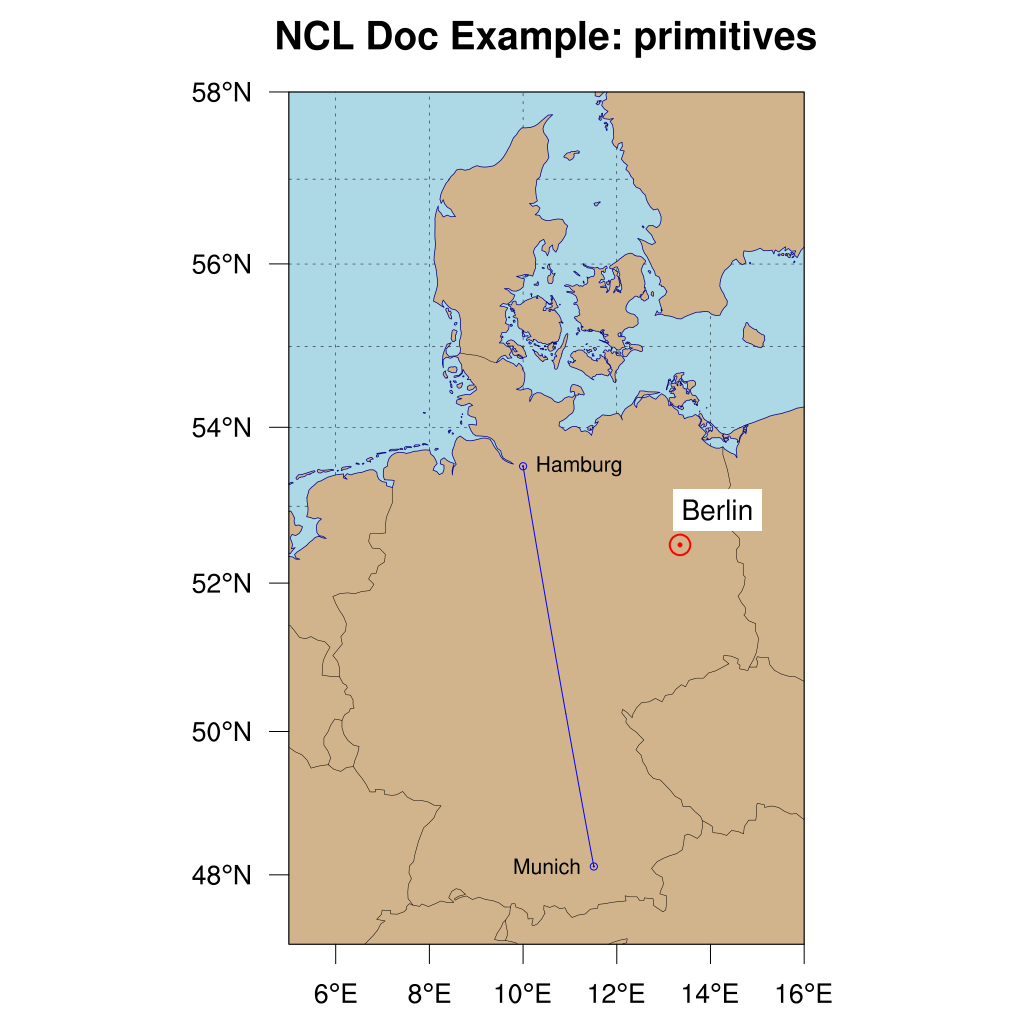

In [8]:

;-- define the workstation (plot type and name)
wks = gsn_open_wks("png","NUG_primitives")

;-- create map to add primitives to
  map = create_map(wks)

;-- add markers, lines, and text to map
  add_city_markers(wks,map)
  add_lines_between_cities(wks,map)
  add_city_labels(wks,map)
  add_colored_text_box(wks,map)

;-- draw the map (and all the attached primitives)
draw(map)
frame(wks)
